# Convolutional Neural Network

### Importing the libraries

In [6]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
tf.__version__

'2.16.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [9]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
)
training_set = train_datagen.flow_from_directory(
        'D:/Belajar Data Science/UDEMY/CNN_Cats-Dogs/CNN_File/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
        'D:/Belajar Data Science/UDEMY/CNN_Cats-Dogs/CNN_File/Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
model = tf.keras.models.Sequential()

### Step 1 - Convolution

In [15]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\Fatoni Murfid S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Step 2 - Pooling

In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [17]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [18]:
model.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [19]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [20]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [22]:
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


C:\Users\Fatoni Murfid S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 164ms/step - accuracy: 0.5485 - loss: 0.6979 - val_accuracy: 0.6235 - val_loss: 0.6518
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.6669 - loss: 0.6171 - val_accuracy: 0.6565 - val_loss: 0.6289
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 147ms/step - accuracy: 0.7094 - loss: 0.5614 - val_accuracy: 0.7525 - val_loss: 0.5136
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.7356 - loss: 0.5184 - val_accuracy: 0.7500 - val_loss: 0.5174
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 146ms/step - accuracy: 0.7449 - loss: 0.5108 - val_accuracy: 0.7720 - val_loss: 0.5073
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step - accuracy: 0.7760 - loss: 0.4761 - val_accuracy: 0.7705 - val_loss: 0.4959
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.7799 - loss: 0.4547 - val_accuracy: 0.7620 - val_loss: 0.4962
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.7771 - loss: 0.4548 - val

## Part 4 - Making a single prediction

In [13]:
import numpy as np 
from keras.preprocessing import image

In [32]:
path = 'D:/Belajar Data Science/UDEMY/CNN_Cats-Dogs/CNN_File/Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_3.jpg'
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


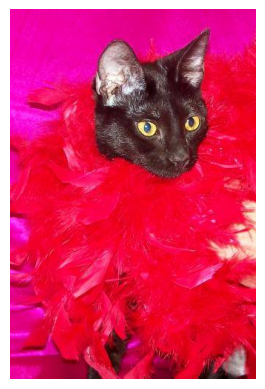

cat


In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Membaca gambar
img = mpimg.imread(path)

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menghilangkan sumbu
plt.show()
print(prediction)

# Save Model

In [34]:
model.save('model_cats_dogs.h5')

model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
    

# from tensorflow.keras.models import load_model

# # Memuat seluruh model
# loaded_model = load_model('model_cnn.h5')